<a href="https://colab.research.google.com/github/Arun2895/Performance_Model/blob/main/Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [18]:
data = {
    'Member': ['John', 'Emily', 'Sophia', 'Mike', 'Emma', 'James', 'Liam', 'Olivia'],
    'Projects_Completed': [5, 8, 3, 2, 10, 1, 7, 4],
    'Workshops_Organized': [2, 4, 1, 1, 5, 0, 3, 2],
    'Volunteer_Hours': [20, 30, 15, 10, 40, 8, 25, 12],
    'Meetings_Attended': [15, 18, 10, 12, 20, 8, 16, 11]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Drop the 'Member' column as it's not numeric
features = df.drop('Member', axis=1)

# Weightage for each feature
weights = {
    'Projects_Completed': 0.5,
    'Workshops_Organized': 0.3,
    'Volunteer_Hours': 0.15,
    'Meetings_Attended': 0.05
}

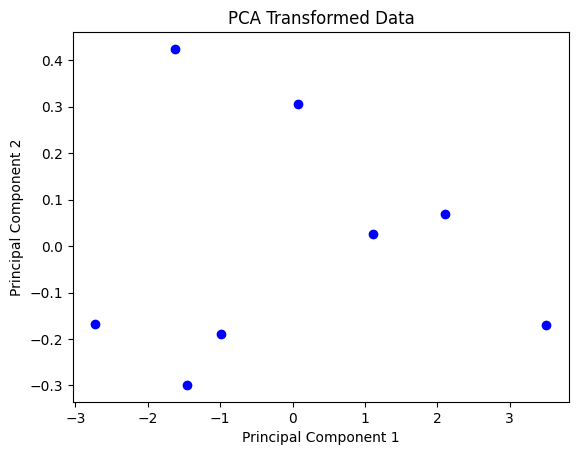

In [19]:
# Apply the weightage to each feature
weighted_features = features.copy()

for feature in weighted_features.columns:
    weighted_features[feature] = weighted_features[feature] * weights[feature]

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weighted_features)

# Apply PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA data to visualize
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', label='PCA Data')
plt.title("PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


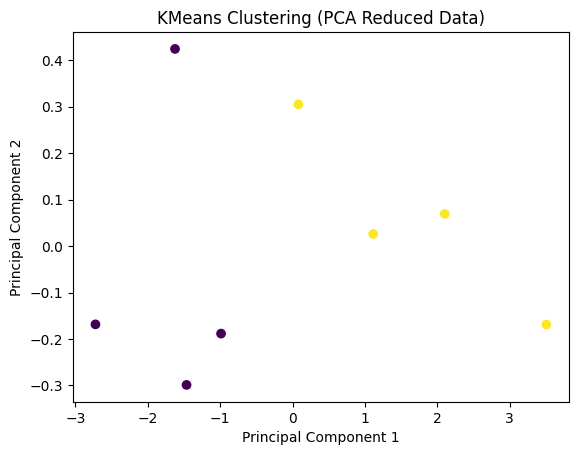

Silhouette Score (KMeans): 0.52716481461027


In [20]:
#KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', label='KMeans Clusters')
plt.title("KMeans Clustering (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
print(f"Silhouette Score (KMeans): {kmeans_silhouette}")
